In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Import the dataset from csv file and read through pandas.
iris = pd.read_csv('data/iris.data.csv', delimiter = ',')

In [8]:
# Examine the shape of the dataset: 150 rows, 5 columns.
iris.shape

(149, 5)

In [10]:
# Number of instances and how many attributes in the dataset. 
# Demonstrates a complete dataset - no null values.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [11]:
# Number of instances of each species shows a balanced dataset - each type is equally represented.
iris.groupby('species').size()

KeyError: 'species'

In [12]:
# Sample look at the dataset.
iris.sample(10)

,5.1,3.5,1.4,0.2,Iris-setosa
91,5.8,2.6,4.0,1.2,Iris-versicolor
132,6.3,2.8,5.1,1.5,Iris-virginica
90,6.1,3.0,4.6,1.4,Iris-versicolor
137,6.0,3.0,4.8,1.8,Iris-virginica
128,7.2,3.0,5.8,1.6,Iris-virginica
129,7.4,2.8,6.1,1.9,Iris-virginica
23,4.8,3.4,1.9,0.2,Iris-setosa
57,6.6,2.9,4.6,1.3,Iris-versicolor
48,5.0,3.3,1.4,0.2,Iris-setosa
40,4.5,2.3,1.3,0.3,Iris-setosa


In [13]:
# Basic statistical features of the dataset as a whole.
iris.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


KeyError: 'species'

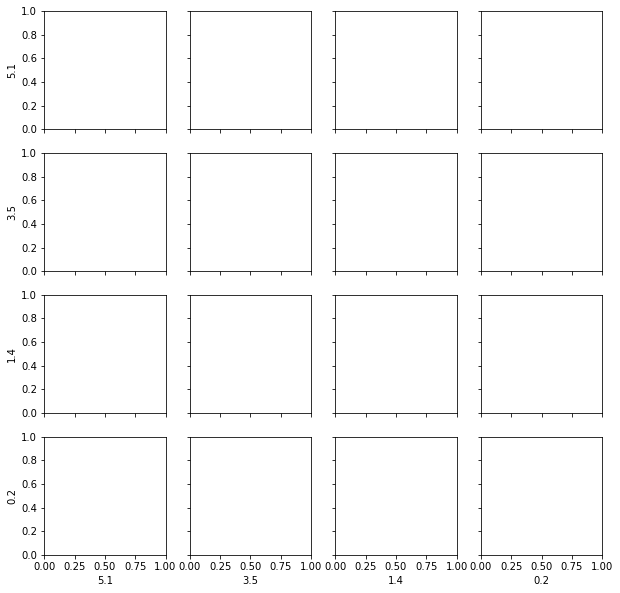

In [14]:
# Initial visual observation of the measurements and relationships between them.
sns.pairplot(iris, hue = 'species') 
plt.show()

In [15]:
# Swarmplots here and below show the distribution of measurements by species.
sns.swarmplot(x = 'species', y = 'sepal_length', data = iris)
plt.show()

ValueError: Could not interpret input 'species'

In [16]:
sns.swarmplot(x = 'species', y = 'sepal_width', data = iris)
plt.show()

ValueError: Could not interpret input 'species'

In [17]:
sns.swarmplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

ValueError: Could not interpret input 'species'

In [18]:
sns.swarmplot(x = 'species', y = 'petal_width', data = iris)
plt.show()

ValueError: Could not interpret input 'species'

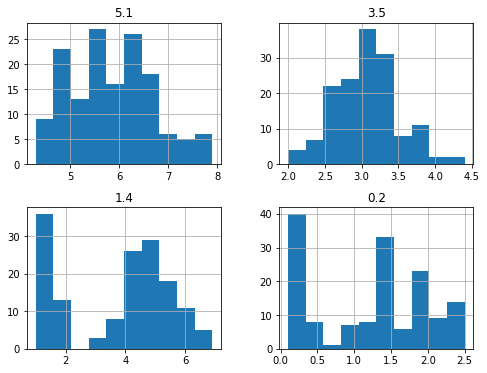

In [20]:
# Histogram of all measurements across all species.
iris.hist(figsize = (8, 6))
plt.show()

In [21]:
# Correlations between measurements.
iris.corr()

,5.1,3.5,1.4,0.2
5.1,1.000000,-0.103784,0.871283,0.816971
3.5,-0.103784,1.000000,-0.415218,-0.350733
1.4,0.871283,-0.415218,1.000000,0.962314
0.2,0.816971,-0.350733,0.962314,1.000000


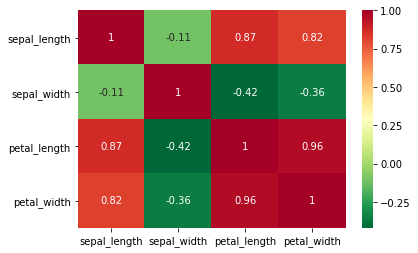

In [15]:
# Visualising correlations with a heatmap.
sns.heatmap(iris.corr(), annot = True, cmap = 'RdYlGn_r') 
plt.show()

In [22]:
# Closer look at scatter plots for petal measurements.
sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter, 'petal_length', 'petal_width').add_legend()
plt.show()

KeyError: 'species'

In [23]:
# Closer look at scatter plots for sepal measurements.
sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
plt.show()

KeyError: 'species'

### Splitting the Dataset 
Below the dataset is split to explore each species individually.

In [24]:
# Creating three smaller datasets, one for each species, so they can be individually assessed.
setosa = iris.loc[0:49]
versicolor = iris.loc[50:99]
virginica = iris.loc[100:149]

# Dropping the fifth column 'species' as not required and interferes with creating histograms.
setosa = setosa.drop(columns = 'species')
versicolor = versicolor.drop(columns = 'species')
virginica = virginica.drop(columns = 'species')

KeyError: "['species'] not found in axis"

### Means and Standard Deviations
Examination of means and standard deviations of each species. Comparison with one another and the whole. 

In [25]:
# Mean values of each individual iris species and dataset as a whole.
sp_mean = iris.groupby('species').mean()
to_mean = iris.mean()
means = sp_mean.append(to_mean, ignore_index=True)
means.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
means

KeyError: 'species'

In [26]:
# Standard deviation values of each individual iris species and dataset as a whole.
sp_std = iris.groupby('species').std()
to_std = iris.std()
std = sp_std.append(to_std, ignore_index=True)
std.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
std

KeyError: 'species'

### Setosa

In [27]:
# Setosa descriptive statistics.
setosa.describe()

,5.1,3.5,1.4,0.2
count,50.000000,50.000000,50.000000,50.000000
mean,5.044000,3.412000,1.530000,0.268000
std,0.451374,0.382067,0.489168,0.195292
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.125000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.675000,1.600000,0.300000
max,7.000000,4.400000,4.700000,1.400000


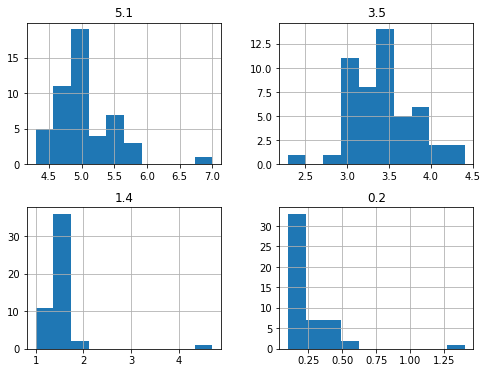

In [28]:
# Histograms displaying distribution of setosa data.
setosa.hist(figsize = (8, 6))
plt.show()

In [29]:
# Setosa correlations.
setosa.corr()

,5.1,3.5,1.4,0.2
5.1,1.000000,0.530584,0.658465,0.643711
3.5,0.530584,1.000000,-0.011793,0.087306
1.4,0.658465,-0.011793,1.000000,0.841275
0.2,0.643711,0.087306,0.841275,1.000000


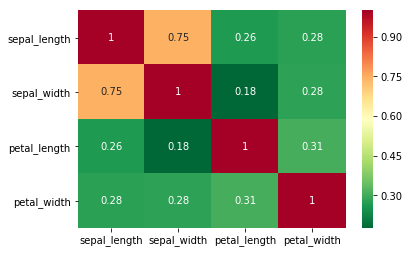

In [24]:
# Setosa correlation heatmap.
sns.heatmap(setosa.corr(), annot=True, cmap='RdYlGn_r') 
plt.show()

### Versicolor

In [30]:
# Versicolor descriptive statistics.
versicolor.describe()

,5.1,3.5,1.4,0.2
count,50.000000,50.000000,50.000000,50.000000
mean,5.922000,2.772000,4.286000,1.348000
std,0.495815,0.316898,0.527222,0.258125
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,6.000000,2.500000


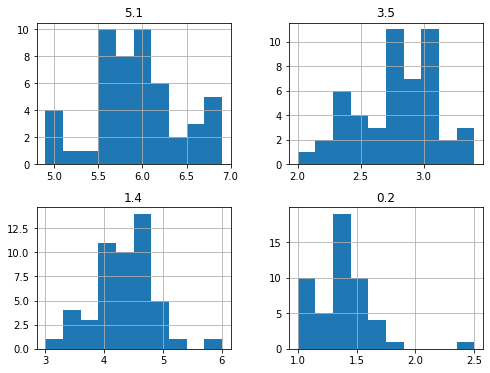

In [31]:
# Histograms displaying distribution of versicolor data.
versicolor.hist(figsize = (8, 6))
plt.show()

In [27]:
# Versicolor correlations.
versicolor.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


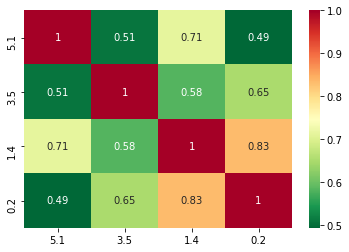

In [32]:
# Versicolor correlation heatmap.
sns.heatmap(versicolor.corr(), annot=True, cmap='RdYlGn_r') 
plt.show()

### Virginica

In [33]:
# Virginica descriptive statistics.
virginica.describe()

,5.1,3.5,1.4,0.2
count,49.000000,49.000000,49.000000,49.000000
mean,6.593878,2.967347,5.542857,2.016327
std,0.641095,0.322353,0.553775,0.268752
min,4.900000,2.200000,4.500000,1.400000
25%,6.200000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


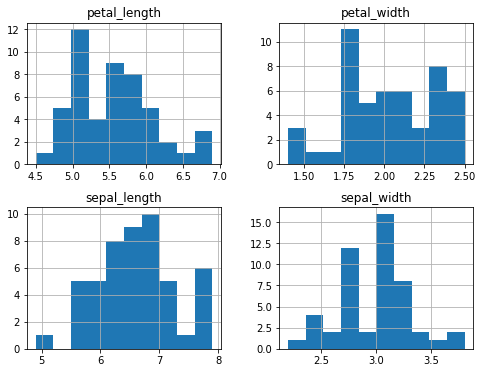

In [30]:
# Histograms displaying distribution of virginica data.
virginica.hist(figsize = (8, 6))
plt.show()

In [35]:
# Virginica correlations.
virginica.corr()

,5.1,3.5,1.4,0.2
5.1,1.000000,0.472820,0.879807,0.307719
3.5,0.472820,1.000000,0.390799,0.523308
1.4,0.879807,0.390799,1.000000,0.304561
0.2,0.307719,0.523308,0.304561,1.000000


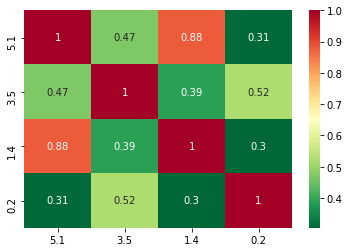

In [34]:
# Virginica correlation heatmap.
sns.heatmap(virginica.corr(), annot=True, cmap='RdYlGn_r') 
plt.show()